# EDA of Customer churnededed Analysis for subscription based Services

In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt





Load the data file 

In [3]:
data = pd.read_excel('churn_data.xlsx')

Look at the top 5 records of data

In [4]:
data.head()

,customer_id,tenure,Age,Gender,subscription_type,monthly_charges,average_monthly_usage,last_login,payment_method,last_payment_status,churned
0,12345,18,30,Male,Basic Plan,199,10.5,2024-04-20,Credit Card,Succeeded,T
1,54321,2,40,Female,Premium Plan,649,2.2,2024-04-11,Paypal,Succeeded,F
2,67890,42,52,Male,Standard Plan,449,15.8,2024-04-07,Debit Card,Succeeded,F
3,24680,10,22,Non-binary,Standard Plan,449,4.1,2024-04-10,Credit Card,Failed,F
4,85210,3,58,Female,Standard Plan,449,8.2,2024-04-23,Direct Debit,Succeeded,F


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [58]:
data.shape

(2236, 11)

In [59]:
data.columns.values

array(['customer_id', 'tenure', 'Age', 'Gender', 'subscription_type',
       'monthly_charges', 'average_monthly_usage', 'last_login',
       'payment_method', 'last_payment_status', 'churned'], dtype=object)

In [60]:
# Checking the data types of all the columns
data.dtypes

customer_id                       int64
tenure                            int64
Age                               int64
Gender                           object
subscription_type                object
monthly_charges                   int64
average_monthly_usage           float64
last_login               datetime64[ns]
payment_method                   object
last_payment_status              object
churned                          object
dtype: object

In [61]:
# Check the descriptive statistics of numeric variables
data.describe()

,customer_id,tenure,Age,monthly_charges,average_monthly_usage
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,54184.279070,12.485242,31.050984,362.416816,18.078229
std,26134.134738,7.031871,8.289779,201.190523,4.626760
min,10104.000000,1.000000,18.000000,149.000000,2.200000
25%,31801.500000,6.000000,24.000000,149.000000,14.210000
50%,53796.500000,12.000000,31.000000,449.000000,18.205000
75%,76967.000000,18.000000,38.000000,649.000000,22.032500
max,99994.000000,42.000000,58.000000,649.000000,25.990000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 7 years

age group (18-40)

Text(0.5, 1.02, 'Count of TARGET Variable per category')

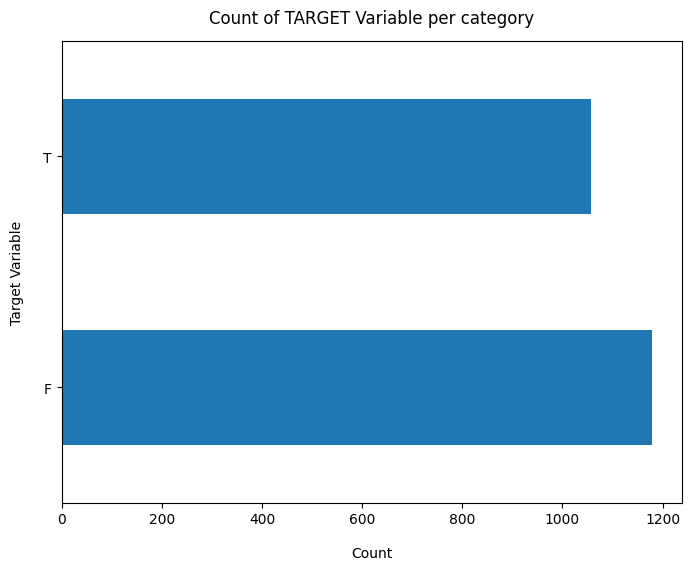

In [12]:
data['churned'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [13]:
100*data['Gender'].value_counts()/len(data['Gender'])

Male          53.220036
Female        46.735242
Non-binary     0.044723
Name: Gender, dtype: float64

In [14]:
data['churned'].value_counts()

F    1179
T    1057
Name: churned, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [15]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            2236 non-null   int64         
 1   tenure                 2236 non-null   int64         
 2   Age                    2236 non-null   int64         
 3   Gender                 2236 non-null   object        
 4   subscription_type      2236 non-null   object        
 5   monthly_charges        2236 non-null   int64         
 6   average_monthly_usage  2236 non-null   float64       
 7   last_login             2236 non-null   datetime64[ns]
 8   payment_method         2236 non-null   object        
 9   last_payment_status    2236 non-null   object        
 10  churned                2236 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 192.3+ KB


## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [16]:
df = data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [17]:
df.monthly_charges = pd.to_numeric(df.monthly_charges, errors='coerce')
df.isnull().sum()

customer_id              0
tenure                   0
Age                      0
Gender                   0
subscription_type        0
monthly_charges          0
average_monthly_usage    0
last_login               0
payment_method           0
last_payment_status      0
churned                  0
dtype: int64

**3.** As we can see there are 0 missing values in TotalCharges column. Let's check these records 

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [18]:
# Get the max tenure
print(df['tenure'].max()) 

42


In [19]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 42, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 50, 12), right=False, labels=labels)

In [20]:
df['tenure_group'].value_counts()

13 - 24    1133
1 - 12     1102
37 - 48       1
25 - 36       0
Name: tenure_group, dtype: int64

In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 10) for i in range(1, 58, 10)]

df['age_group'] = pd.cut(df.Age, range(1, 66, 10), right=False, labels=labels)

**6.** Remove columns not required for processing

In [24]:
#drop column customerID and tenure
df.drop(columns= ['customer_id','tenure',"Age"], axis=1, inplace=True)
df.head()

KeyError: "['customer_id', 'tenure'] not found in axis"

## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

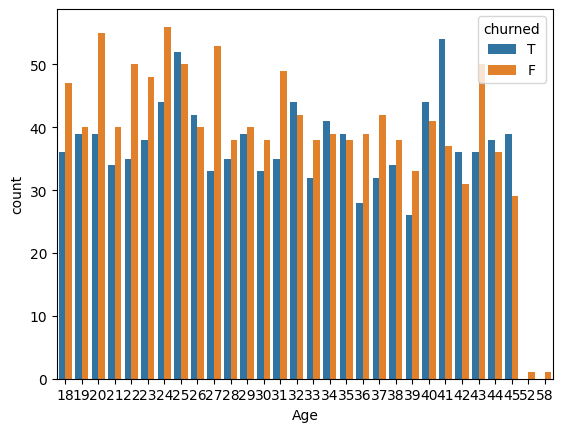

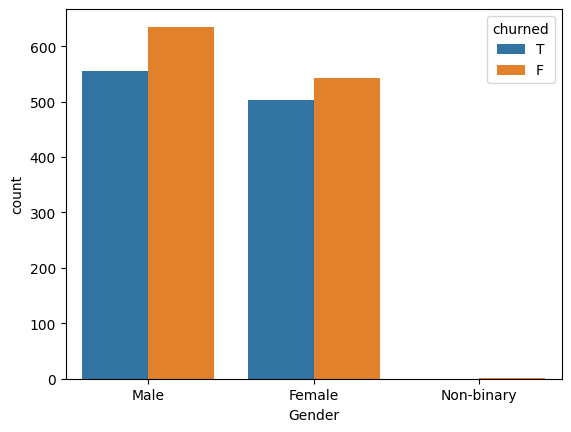

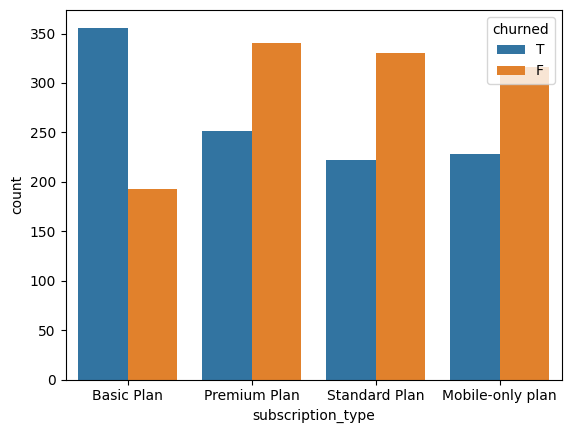

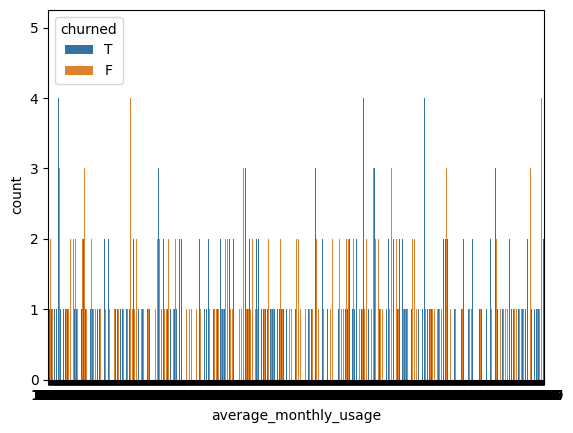

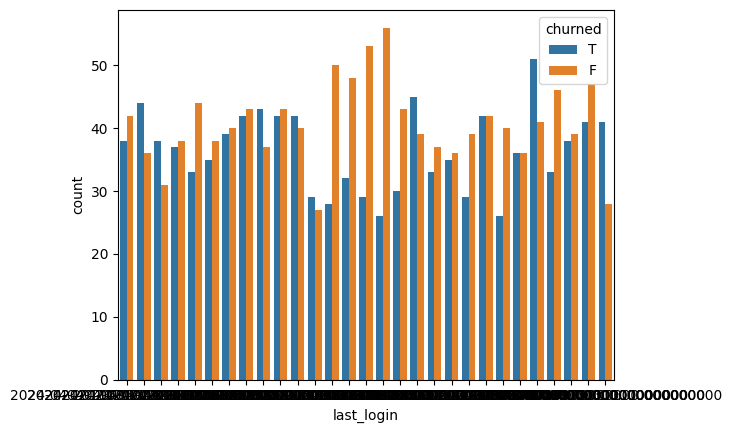

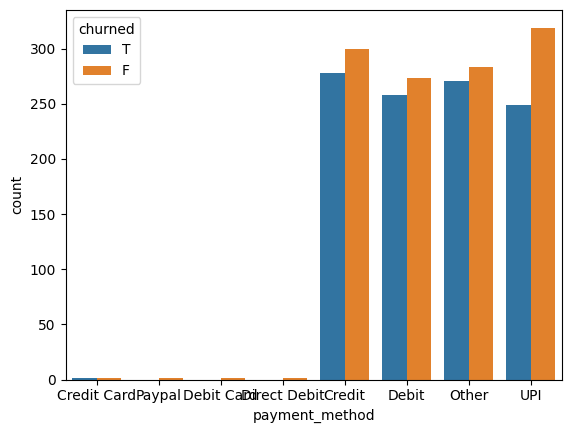

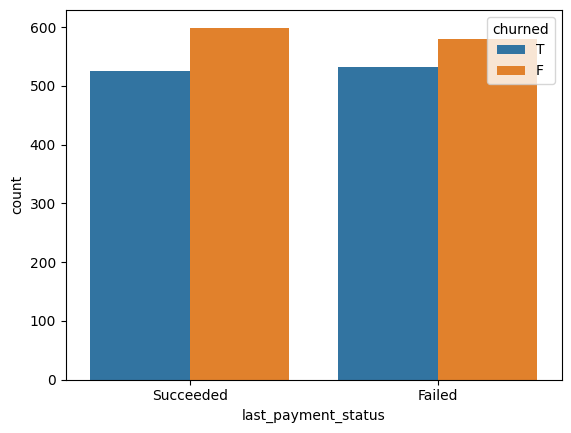

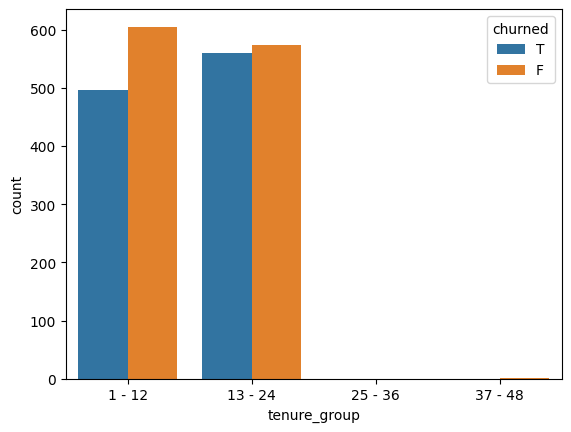

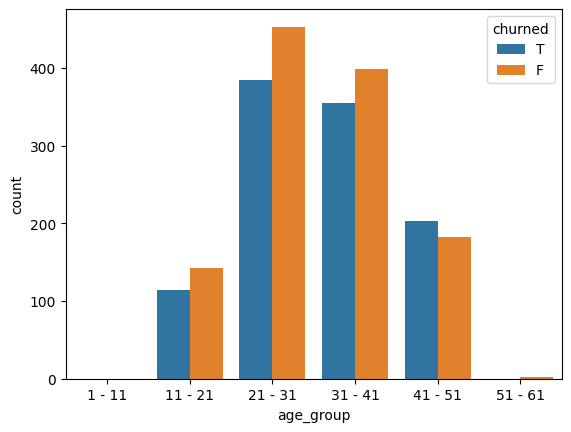

In [25]:
for i, predictor in enumerate(df.drop(columns=['churned', 'monthly_charges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='churned')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [26]:
df['churned'] = np.where(df.churned == 'T',1,0)

In [27]:
df.head()

,Age,Gender,subscription_type,monthly_charges,average_monthly_usage,last_login,payment_method,last_payment_status,churned,tenure_group,age_group
0,30,Male,Basic Plan,199,10.5,2024-04-20,Credit Card,Succeeded,1,13 - 24,21 - 31
1,40,Female,Premium Plan,649,2.2,2024-04-11,Paypal,Succeeded,0,1 - 12,31 - 41
2,52,Male,Standard Plan,449,15.8,2024-04-07,Debit Card,Succeeded,0,37 - 48,51 - 61
3,22,Non-binary,Standard Plan,449,4.1,2024-04-10,Credit Card,Failed,0,1 - 12,21 - 31
4,58,Female,Standard Plan,449,8.2,2024-04-23,Direct Debit,Succeeded,0,1 - 12,51 - 61


**3.** Convert all the categorical variables into dummy variables

In [28]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Age,monthly_charges,average_monthly_usage,last_login,churned,Gender_Female,Gender_Male,Gender_Non-binary,subscription_type_Basic Plan,subscription_type_Mobile-only plan,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,age_group_1 - 11,age_group_11 - 21,age_group_21 - 31,age_group_31 - 41,age_group_41 - 51,age_group_51 - 61
0,30,199,10.5,2024-04-20,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,40,649,2.2,2024-04-11,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,52,449,15.8,2024-04-07,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,22,449,4.1,2024-04-10,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,58,449,8.2,2024-04-23,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


**10. ** Churn by Monthly Charges and Total Charges

C:\Users\DELL\AppData\Local\Temp\ipykernel_24148\2058072215.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.monthly_charges[(df_dummies["churned"] == 0) ],
C:\Users\DELL\AppData\Local\Temp\ipykernel_24148\2058072215.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.monthly_charges[(df_dummies["churned"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

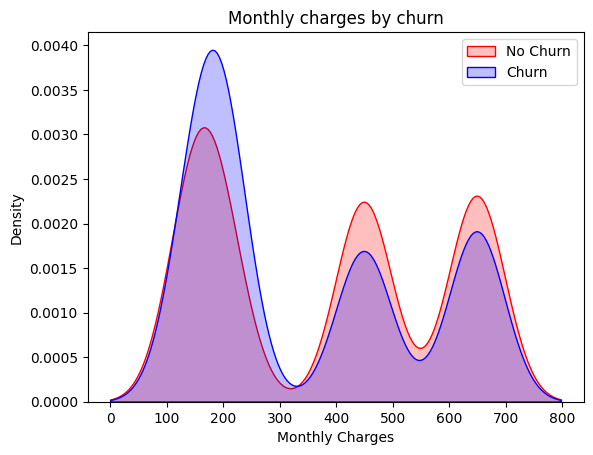

In [32]:
Mth = sns.kdeplot(df_dummies.monthly_charges[(df_dummies["churned"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.monthly_charges[(df_dummies["churned"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

**11. Build a corelation of all predictors with 'Churn' **

C:\Users\DELL\AppData\Local\Temp\ipykernel_24148\3014050982.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dummies.corr()['churned'].sort_values(ascending = False).plot(kind='bar')


<AxesSubplot: >

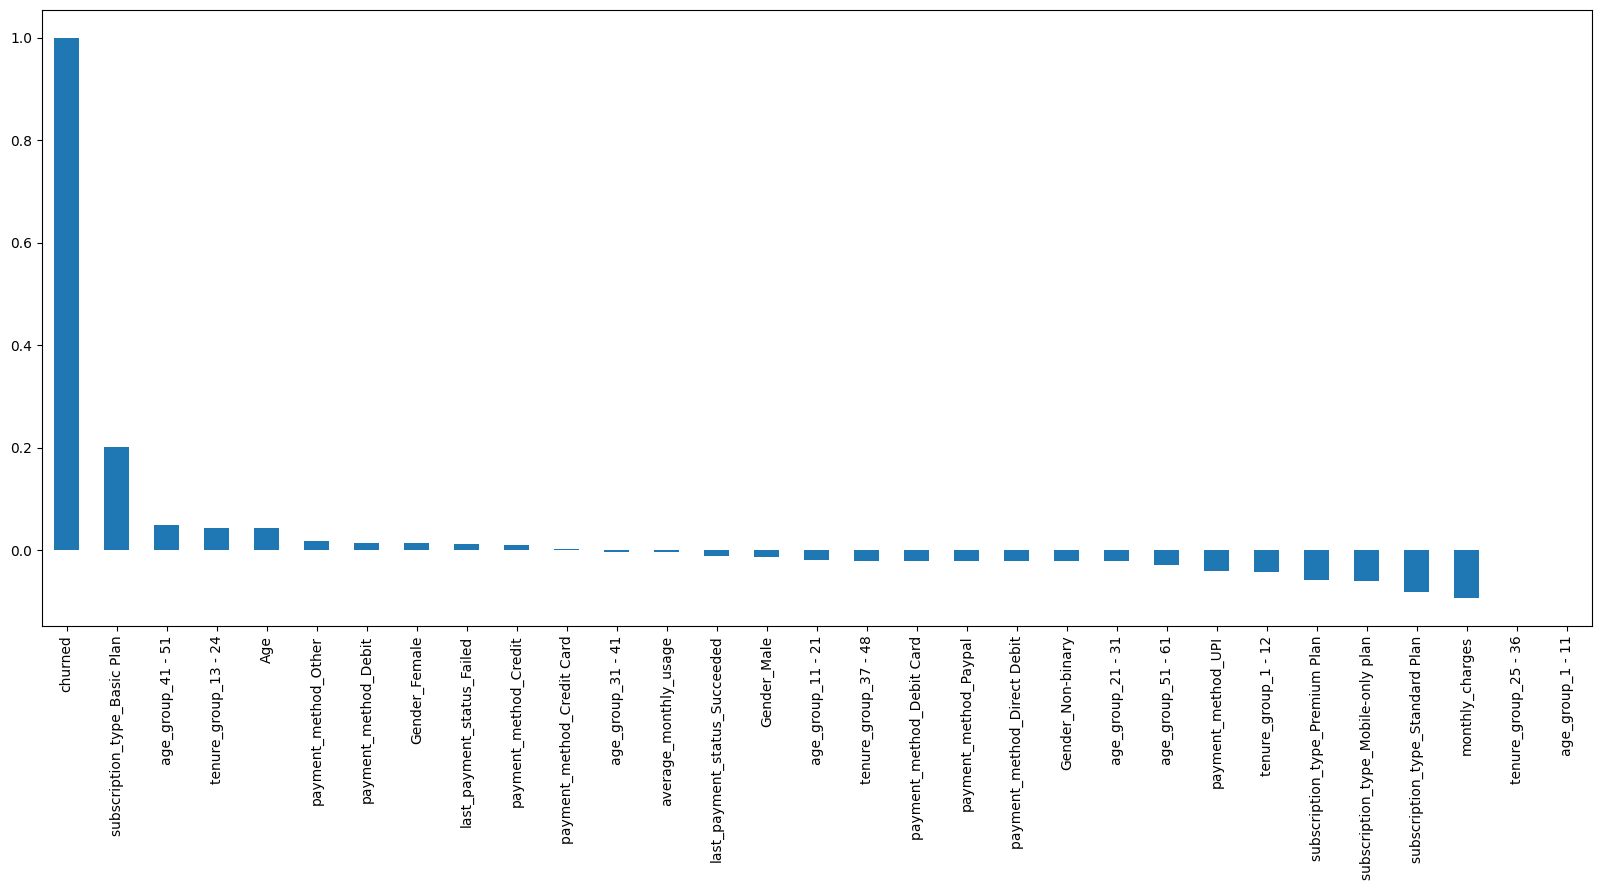

In [33]:
plt.figure(figsize=(20,8))
df_dummies.corr()['churned'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

C:\Users\DELL\AppData\Local\Temp\ipykernel_24148\3316964612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dummies.corr(), cmap="Paired")


<AxesSubplot: >

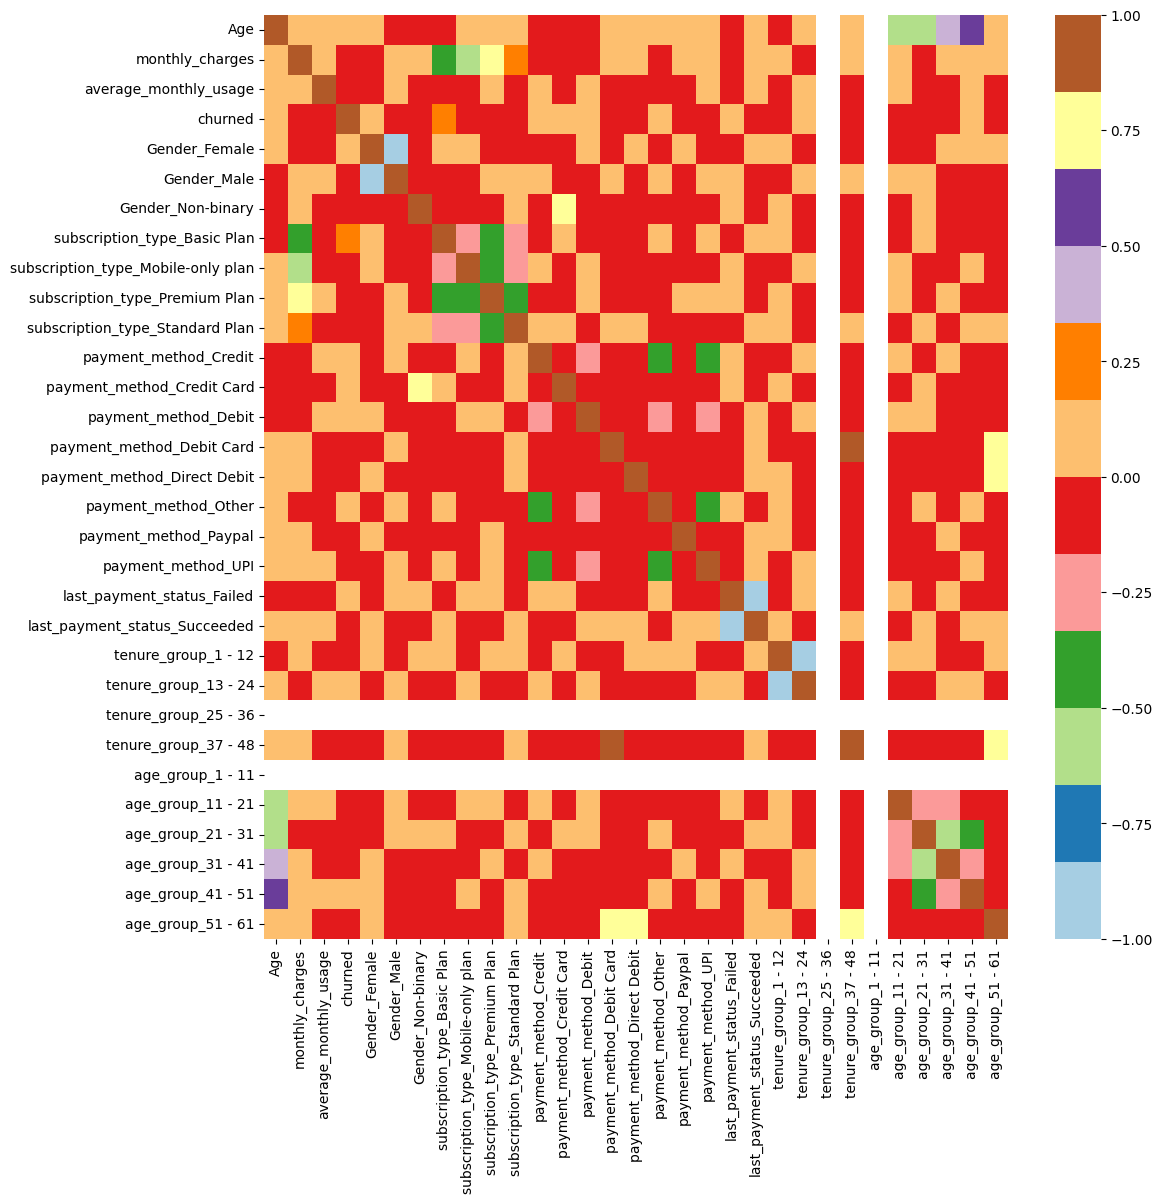

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [36]:
new_df1_target0=df.loc[df["churned"]==0]
new_df1_target1=df.loc[df["churned"]==1]

In [37]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

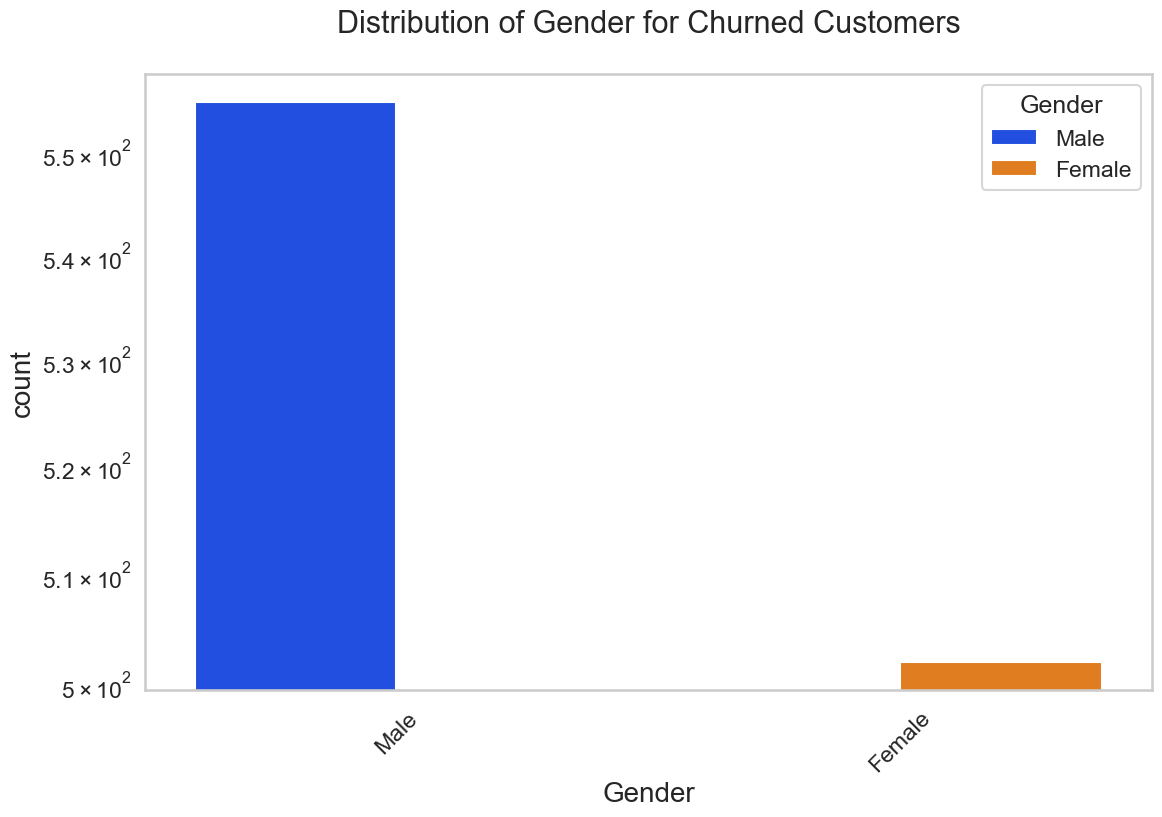

In [40]:
uniplot(new_df1_target1,col='Gender',title='Distribution of Gender for Churned Customers',hue='Gender')

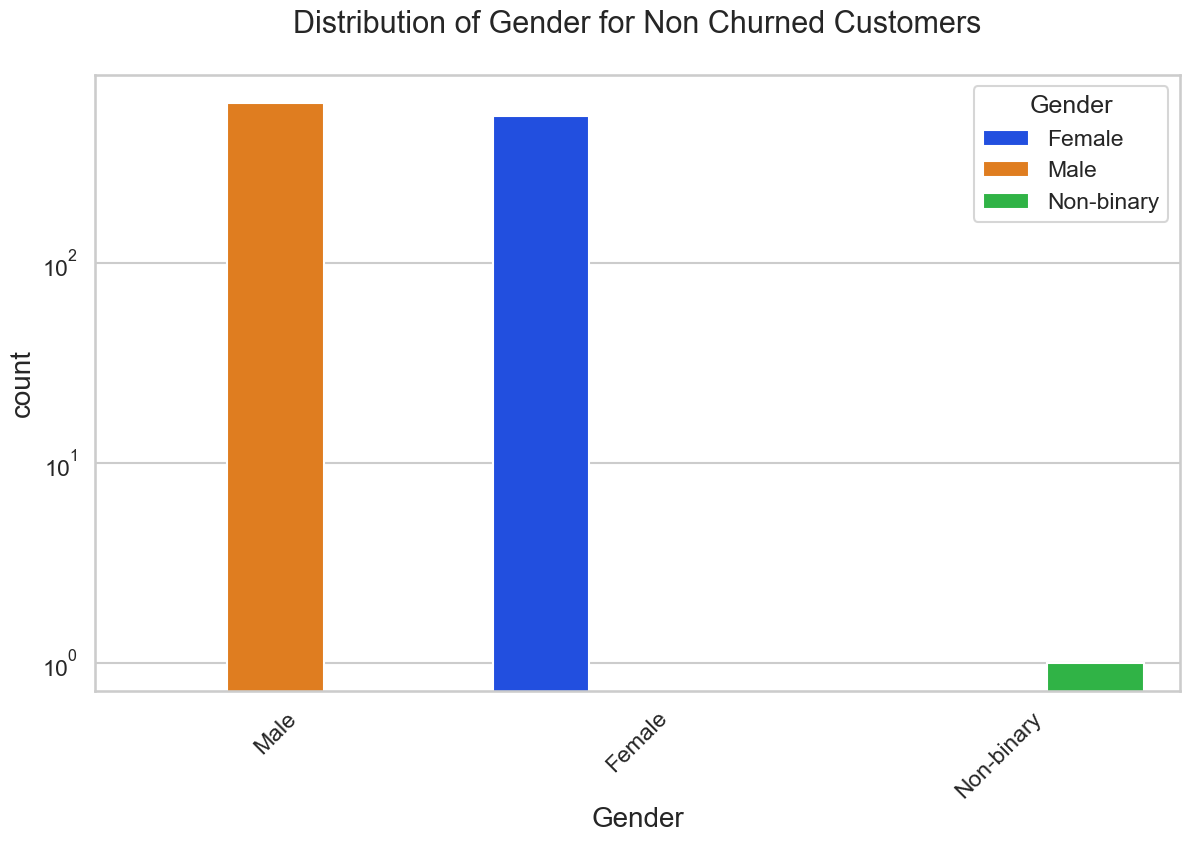

In [41]:
uniplot(new_df1_target0,col='Gender',title='Distribution of Gender for Non Churned Customers',hue='Gender')

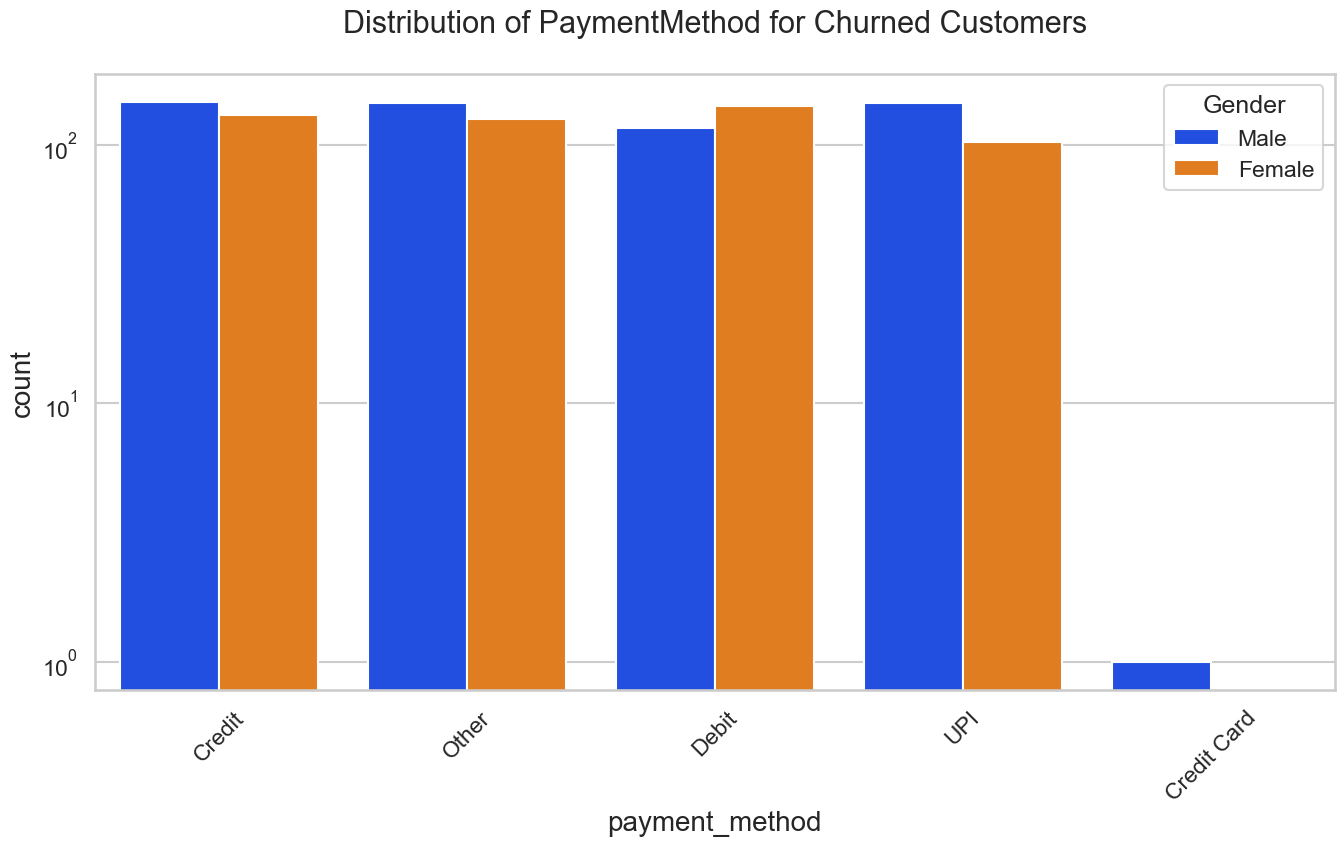

In [43]:
uniplot(new_df1_target1,col='payment_method',title='Distribution of PaymentMethod for Churned Customers',hue='Gender')

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [44]:
df_dummies.to_csv('churn_data.csv')